테스트셋 다운로드 및 분석

In [1]:
!git clone https://github.com/ndb796/Scene-Classification-Dataset 
# 폴더 안으로 이동
%cd Scene-Classification-Dataset

Cloning into 'Scene-Classification-Dataset'...
remote: Enumerating objects: 24303, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 24303 (delta 0), reused 6 (delta 0), pack-reused 24297
Receiving objects: 100% (24303/24303), 364.74 MiB | 27.36 MiB/s, done.
Resolving deltas: 100% (40/40), done.
Checking out files: 100% (24341/24341), done.
/content/Scene-Classification-Dataset


In [2]:
import os
import pandas as pd
path = 'train-scene classification/'
file_list = os.listdir(path + 'train/')
dataset = pd.read_csv(path + 'train.csv')
print('전체 이미지의 개수:', len(file_list))
print('학습 이미지의 개수:', len(dataset))
print('label 5 의 이미지 개수 :' ,len(dataset[dataset.label == 5]))

전체 이미지의 개수: 24335
학습 이미지의 개수: 17034
label 5 의 이미지 개수 : 2883


이미지의 해상도: (64, 64, 3)


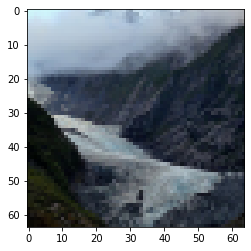

In [3]:
# 데이터 이미지중 하나 미리보기

from skimage.transform import resize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


img = Image.open(path + 'train/' + file_list[1])
img = np.asarray(img)
img = resize(img, (64, 64, 3))
print('이미지의 해상도:', img.shape)

# 이미지 출력하기
plt.imshow(img)
plt.show()

학습데이터와 검증 데이터셋 구성

In [4]:
#https://hyjykelly.tistory.com/44

from sklearn.model_selection import train_test_split


train_dataset, val_dataset = train_test_split(dataset, test_size=0.2)

print('학습 데이터셋 크기:', len(train_dataset))
print('검증 데이터셋 크기:', len(val_dataset))


#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#print('학습 데이터셋 크기:', len(X_train))
#print('검증 데이터셋 크기:', len(y_train))


학습 데이터셋 크기: 13627
검증 데이터셋 크기: 3407


In [5]:
#학습 데이터와 테스트 데이터로 나눴다면 데이터 세트의 구성을 설정해 준다

# 학습 데이터 (train , val)
#X (대문자)-> 텐서, 소문자는 벡터
# X_train(1376,64,64,3) 배치사이즈 1376개의 데이터 64*64 사이즈 컬러 이미지
# y_train(1376) 정답
X_train =[]
y_train=[]
#index, row[image_name'], row['label'] 으로 이루어진 data frame
for index, row in train_dataset.iterrows():
    img = Image.open( path + 'train/' + row['image_name']) #train 이미지 데이터에서 가져와서
    img = np.asarray(img) #어레이로 저장
    img = resize(img,(64,64,3)) # 크기 resize


    X_train.append(img)
    y_train.append(row['label'])

X_train = np.array(X_train) #array 객체로 만들어줌
y_train = np.array(y_train)

 #val
X_val =[]
y_val =[]

for index, row in val_dataset.iterrows():

    img= Image.open(path + 'train/' + row['image_name'])
    img = np.asarray(img)
    img = resize(img, (64,64,3))

    X_val.append(img)
    y_val.append(row['label'])

X_val= np.array(X_val)
y_val = np.array(y_val)

X_train.shape

(13627, 64, 64, 3)

데이터를 불러와서 X는 이미지, y는 정답인 레이블

In [6]:
print('학습 이미지', X_train.shape)
print('학습 레이블', y_train.shape)
print('검증 이미지', X_val.shape)
print('검증 레이블', y_val.shape)

학습 이미지 (13627, 64, 64, 3)
학습 레이블 (13627,)
검증 이미지 (3407, 64, 64, 3)
검증 레이블 (3407,)


학습 이미지 확인 - 학습 데이터셋 시각화

빌딩이라는 컬럼에 있는 이미지는 모두 빌딩이어야 한다




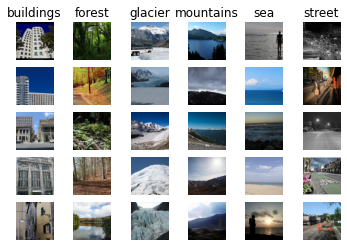

In [7]:
# 데이터 셋에서 각 클래스에 따른 일부 데이터 시각화
classes =['buildings', 'forest', 'glacier', 'mountains', 'sea','street']
# 각 클래스별 특정 개수 이미지 출력
samples_per_class = 5

#데이터 시각화 함수 구현
def visualize_data(dataset,classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes): 
        #인덱스와 원소 동시 접근
        idxs = np.flatnonzero(y_train == y) #특정 조건을 만족하는 인덱스를 리턴 이건 array로 리턴해줌
        idxs = np.random.choice(idxs, samples_per_class) #그렇게 만든 인덱스중 samples_perclass 만큼 무작위 선택
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y +1 
            plt.subplot(samples_per_class, num_classes, plt_idx)
            #row, col, idx
            plt.imshow(X_train[idx])
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

visualize_data(X_train, classes, samples_per_class)    

학습/검증 데이터셋 전처리

선형모델을 학습할거니까 각 이미지를 벡터로 변경해준다

X_train: (13627, 64, 64, 3)
y_train: (13627,)
X_test: (3407, 64, 64, 3)
y_test: (3407,) 를


X_train: (13627, 12288)
y_train: (13627,)
X_test: (3407, 12288)
y_test: (3407,)

로 바꿔준다



In [9]:
X_train = X_train.reshape(13627,12288)
X_val = X_val.reshape(3407,12288)
print('학습 이미지', X_train.shape)
print('학습 레이블', y_train.shape)
print('검증 이미지', X_val.shape)
print('검증 레이블', y_val.shape)

학습 이미지 (13627, 12288)
학습 레이블 (13627,)
검증 이미지 (3407, 12288)
검증 레이블 (3407,)


이렇게 구성된 학습 데이터 셋을 logistic regression 라이브러리를 이용해 선형 분류 모델을 학습해 보자

sklearn.linear_model에서 제공하는 logisticregression 라이브러리를 사용할거고 
이 라이브러리의 주요 파라미터는 
penalty -> 정규화 목적으로 사용할 norm 명시 (기본 l2
solver : 최적화를 진행할때 사용할 알고리즘 (기본 lbfgs
max_iter -> 수렴을 위해 반복할 횟수(기본 100
verbose -> 자세한 학습 결과를 표시 (기본 0


In [11]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time() # 시작 시간

model = LogisticRegression(multi_class = "multinomial", solver = 'lbfgs', max_iter= 10)
model.fit(X_train, y_train)

print("소요된 시간 (초단위) : ",time.time() -start_time) #실행시간

소요된 시간 (초단위) :  17.46239686012268


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


정확도 검증 - accuracy_score 메소드 사용
모델이 예측한 결과와 실제 결과를 비교해 결과를 내뱉음
48-50정도 나올 듯


In [12]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)
print('학습 데이터셋 정확도 :', train_acc)

y_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)
print('검증 데이터 셋 정확도 : ', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도 : 0.4979085638805313
검증 데이터 셋 정확도 :  0.4813619019665395
클래스: [0 1 2 3 4 5]
반복 횟수: [10]
학습된 가중치 크기: (6, 12288)


데이터 증진 방법
flip(뒤집기)와 shift(이동)


In [13]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((64,64,3))
    #dy는 너비, dx는 높이 기준으로 이동할 크기
    shifted_image = shift(image, [dy,dx,0])
    return shifted_image.reshape([-1])


def horizontal_flip(image):
    image = image.reshape((64,64,3))
    # 수직반전 axis =0, 수평반전 axis =1
    flipped_image = np.flip(image, axis=1)
    return flipped_image.reshape([-1])

데이터 증진 방법을 사용해 linear regression 정확도를 55 정도로 높여보자 (정규화는 옵션이니까 걍 안함)

In [14]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]
#하나씩 이미지를 확인하며 변형된 이미지를 추가할것

cnt= 0
for image, label in zip(X_train, y_train):
    dx = np.random.uniform(1,3)
    dy = np.random.uniform(1,3)
    X_train_augmented.append(shift_image(image, dx, dy))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 증진된 데이터들을 섞기(shuffle)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_val= scaler.transform(X_val)
X_train = scaler.transform(X_train)

model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=20)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=20, multi_class='multinomial')

In [18]:
y_pred = model.predict(X_train_augmented)
train_acc = accuracy_score(y_train_augmented, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.39528142657958465
검증 데이터셋 정확도: 0.5444672732609334
클래스: [0 1 2 3 4 5]
반복 횟수: [20]
학습된 가중치 크기: (6, 12288)


knn 모델


1.   거리기반이기 분류 알고리즘이라 거리 메트릭이 중요하다


현재 L1_distance(), L2_distance() 만 존재하며 자신만의 거리 매트릭스를 추가해보자

2.  그 외 데이터 증진 등 다양한 기법을 사용해 검증도를 높여보자

-> 즉 적절한 k, distance metric 인 하이퍼 파라미터를 찾아야함